In [909]:
# IND11 = [
#     "Rohit Sharma (c)",
#     "Virat Kohli",
#     "Rishabh Pant (wk)",
#     "Suryakumar Yadav",
#     "Shivam Dube",
#     "Hardik Pandya",
#     "Ravindra Jadeja",
#     "Axar Patel",
#     "Jasprit Bumrah",
#     "Arshdeep Singh",
#     "Mohammed Siraj"
# ]

# AUS11 = [
#     "David Warner",
#     "Aaron Finch (C)",
#     "Mitchell Marsh", 
#     "Steven Smith", 
#     "Glenn Maxwell",
#     "Marcus Stoinis",
#     "Matthew Wade (wk)",
#     "Pat Cummins",
#     "Mitchell Starc",
#     "Adam Zampa",
#     "Josh Hazlewood"
# ]

Ind_player_info = {
    "Position":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    "Player Name":["Rohit Sharma (c)",
                    "Virat Kohli",
                    "Rishabh Pant (wk)",
                    "Suryakumar Yadav",
                    "Shivam Dube",
                    "Hardik Pandya",
                    "Ravindra Jadeja",
                    "Axar Patel",
                    "Jasprit Bumrah",
                    "Arshdeep Singh",
                    "Mohammed Siraj"],
    "Is_Captain":[True,False,False,False,False,False,False,False,False,False,False],
    "Is_WicketKeeper":[False,False,True,False,False,False,False,False,False,False,False],
    "Batsman":[True,True,True,True,True,True,True,True,False,False,False],
    "Bowler":[False,False,False,False,True,True,True,True,True,True,True],
    "All-Rounder":[False,False,False,False,True,True,True,True,False,False,False],
    "Batting-Power":[85,85,85,80,75,70,65,60,50,45,45],
    "Bowling-Power":[35,40,35,35,65,70,75,70,75,75,75],
    "Batting-Style":["Right-Hand","Right-Hand","Left-Hand","Right-Hand","Left-Hand","Right-Hand","Left-Hand","Left-Hand","Right-Hand","Left-Hand","Right-Hand"]
}

# Aus_player_info = {
#     "Position":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
#     "Player Name":["David Warner",
#                     "Aaron Finch (C)",
#                     "Mitchell Marsh", 
#                     "Steven Smith", 
#                     "Glenn Maxwell",
#                     "Marcus Stoinis",
#                     "Matthew Wade (wk)",
#                     "Pat Cummins",
#                     "Mitchell Starc",
#                     "Adam Zampa",
#                     "Josh Hazlewood"],
#     "Is_Captain":[],
#     "Is_WicketKeeper":[],
#     "Batsman":[],
#     "Bowler":[],
#     "All-Rounder":[],
#     "Batting-Power":[],
#     "Bowling-Power":[],
# }

import pandas as pd

ind_player_info_table = pd.DataFrame(Ind_player_info)
ind_player_info_table

,Position,Player Name,Is_Captain,Is_WicketKeeper,Batsman,Bowler,All-Rounder,Batting-Power,Bowling-Power,Batting-Style
0,1,Rohit Sharma (c),True,False,True,False,False,85,35,Right-Hand
1,2,Virat Kohli,False,False,True,False,False,85,40,Right-Hand
2,3,Rishabh Pant (wk),False,True,True,False,False,85,35,Left-Hand
3,4,Suryakumar Yadav,False,False,True,False,False,80,35,Right-Hand
4,5,Shivam Dube,False,False,True,True,True,75,65,Left-Hand
5,6,Hardik Pandya,False,False,True,True,True,70,70,Right-Hand
6,7,Ravindra Jadeja,False,False,True,True,True,65,75,Left-Hand
7,8,Axar Patel,False,False,True,True,True,60,70,Left-Hand
8,9,Jasprit Bumrah,False,False,False,True,False,50,75,Right-Hand
9,10,Arshdeep Singh,False,False,False,True,False,45,75,Left-Hand


In [910]:
def ProbSys(player):
    player_bat_power = (ind_player_info_table['Batting-Power'][ind_player_info_table['Player Name']==player].values[0])/100
    # player_bowl_power = (ind_player_info_table['Bowling-Power'][ind_player_info_table['Player Name']==player].values[0])/100
    # player_bat_power = 0.80
    bat_probs = [
        (1 - player_bat_power) * 0.75,   # 0
        player_bat_power * 0.10,         # 1
        player_bat_power * 0.20,         # 2
        player_bat_power * 0.30,         # 4
        player_bat_power * 0.40,         # 6
        (1 - player_bat_power) * 0.25    # Out
    ]
    # Normalize probabilities to sum up to 1
    total = sum(bat_probs)
    bat_probs = [p / total for p in bat_probs]
    return bat_probs

In [956]:
import time

def MatchPlay(Team_Table,):
    print("---------Match Begins------------")
    print()
    all_batsmen = Team_Table['Player Name']
    
    wickets_fall = 0
    
    pair = {
        "P1":all_batsmen[0],
        "P2":all_batsmen[1]
    }
    
    match_scorecard_Batting = {
        "Batsman":all_batsmen,
        "Runs": [0,0,0,0,0,0,0,0,0,0,0],
        "Balls":[0,0,0,0,0,0,0,0,0,0,0],
        "Strike-Rate":[0,0,0,0,0,0,0,0,0,0,0],
        "Fours":[0,0,0,0,0,0,0,0,0,0,0],
        "Six":[0,0,0,0,0,0,0,0,0,0,0]
    }
    
    
    strike = {
        "Striker":"P1"
    }
    
    opts = [0,1,2,4,6,"Out"]
    P1_probs = ProbSys(pair["P1"])
    
    per_over_runs = {}
    per_over_wkts = {}
    overs = 20
    
    while (wickets_fall < 10):
        for over in range(overs):
            over_run = 0
            over_wkt = 0
            for j in range(6):
                ball = random.choices(opts,P1_probs)[0]
                print(pair[strike["Striker"]],":",ball)
                
                # Striker Index in match_scorecard_Batting's Batting List
                str_idx = list(match_scorecard_Batting["Batsman"]).index(pair[strike["Striker"]])
                match_scorecard_Batting["Balls"][str_idx] += 1
                if ball != "Out":                
                    match_scorecard_Batting["Runs"][str_idx] += ball
                    over_run += ball
                    Str_rate = round((match_scorecard_Batting["Runs"][str_idx] / match_scorecard_Batting["Balls"][str_idx])*100,0)
                    match_scorecard_Batting["Strike-Rate"][str_idx] = Str_rate
                    if ball == 4:
                        match_scorecard_Batting["Fours"][str_idx] += 1
                    elif ball == 6:
                        match_scorecard_Batting["Six"][str_idx] += 1
    
                # Changing the Strike
    
                if ball == 1:
                    if strike["Striker"]=="P1":
                        strike["Striker"]="P2"
                    else:
                        strike["Striker"]="P1"
                elif ball == "Out":
                    wickets_fall+=1
                    over_wkt += 1
                    Str_rate = round((match_scorecard_Batting["Runs"][str_idx] / match_scorecard_Batting["Balls"][str_idx])*100,0)
                    match_scorecard_Batting["Strike-Rate"][str_idx] = Str_rate
                    if wickets_fall == 10:
                        break
                    else:
                        pair[strike["Striker"]] = all_batsmen[wickets_fall+1]
                    
                # time.sleep(0.5)
    
                    
            if wickets_fall == 10:
                break
            print(f"\n--------- END OF OVER {over+1} ---------")
            print(f'''IND\t\t\t: {sum(list(match_scorecard_Batting["Runs"]))}/{wickets_fall}''')
            print(f'''Run-Rate\t\t: {round(sum(list(match_scorecard_Batting["Runs"]))/(over+1),2)}''')
            print(f'''{pair["P1"]}\t: {match_scorecard_Batting["Runs"][list(match_scorecard_Batting["Batsman"]).index(pair["P1"])]} Runs''')
            print(f'''{pair["P2"]}\t: {match_scorecard_Batting["Runs"][list(match_scorecard_Batting["Batsman"]).index(pair["P2"])]} Runs''')
            print(f"---------------------------------\n")
    
            per_over_runs[over+1] = over_run
            per_over_wkts[over+1] = over_wkt
            
            # time.sleep(1)
            
            if strike["Striker"]=="P1":
                strike["Striker"]="P2"
            else:
                strike["Striker"]="P1"
        break
    
    
    
    sc = pd.DataFrame(match_scorecard_Batting)
    
    sc["Batsman"] = sc["Batsman"].str.replace(pair["P1"],f'''{pair["P1"]} *''')
    sc["Batsman"] = sc["Batsman"].str.replace(pair["P2"],f'''{pair["P2"]} *''')
    
    print(sc)

In [958]:
MatchPlay(ind_player_info_table)

---------Match Begins------------

Rohit Sharma (c) : 2
Rohit Sharma (c) : 6
Rohit Sharma (c) : 6
Rohit Sharma (c) : 6
Rohit Sharma (c) : 0
Rohit Sharma (c) : 4

--------- END OF OVER 1 ---------
IND			: 24/0
Run-Rate		: 24.0
Rohit Sharma (c)	: 24 Runs
Virat Kohli	: 0 Runs
---------------------------------

Virat Kohli : 2
Virat Kohli : 2
Virat Kohli : 6
Virat Kohli : 6
Virat Kohli : 6
Virat Kohli : 2

--------- END OF OVER 2 ---------
IND			: 48/0
Run-Rate		: 24.0
Rohit Sharma (c)	: 24 Runs
Virat Kohli	: 24 Runs
---------------------------------

Rohit Sharma (c) : Out
Rishabh Pant (wk) : 2
Rishabh Pant (wk) : 2
Rishabh Pant (wk) : 4
Rishabh Pant (wk) : 0
Rishabh Pant (wk) : 6

--------- END OF OVER 3 ---------
IND			: 62/1
Run-Rate		: 20.67
Rishabh Pant (wk)	: 14 Runs
Virat Kohli	: 24 Runs
---------------------------------

Virat Kohli : 6
Virat Kohli : 4
Virat Kohli : 4
Virat Kohli : 2
Virat Kohli : 1
Rishabh Pant (wk) : 2

--------- END OF OVER 4 ---------
IND			: 81/1
Run-Rate		: 

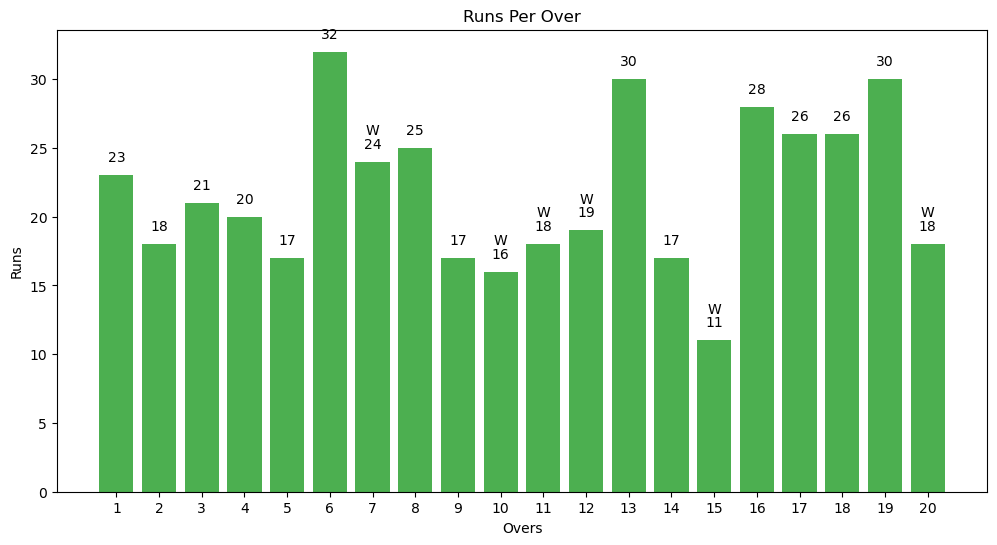

In [954]:
# Runs Per Over (RPO) Bar Graph

import matplotlib.pyplot as plt
import numpy as np

def addlabels(x,y,w_x,w_y):
    for i in range(len(x)):
        plt.text(i+1,y[i]+2,(w_y[i])*"W",ha = 'center')
        plt.text(i+1,y[i]+1,y[i],ha = 'center')


# def AddWktLabels(x,y):
#     for j in range(len(x)):
#         plt.text()

w_x = list(per_over_wkts.keys())
w_y = list(per_over_wkts.values())
    

x = list(per_over_runs.keys())
y = list(per_over_runs.values())

plt.figure(figsize=(12,6))
plt.bar(x,y,color="#4CAF50")
# addlabels(x,y)
addlabels(x,y,w_x,w_y)

plt.title("Runs Per Over")
plt.xlabel("Overs")
plt.ylabel("Runs")

plt.xticks(np.arange(1, 21, step=1))

plt.show()

In [955]:
per_over_wkts

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 1,
 8: 0,
 9: 0,
 10: 1,
 11: 1,
 12: 1,
 13: 0,
 14: 0,
 15: 1,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 1}

In [931]:
# Bowling System

bowlers = ind_player_info_table["Player Name"][ind_player_info_table["Bowler"]==True].values
bowlers

array(['Shivam Dube', 'Hardik Pandya', 'Ravindra Jadeja', 'Axar Patel',
       'Jasprit Bumrah', 'Arshdeep Singh', 'Mohammed Siraj'], dtype=object)